Source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from collections import defaultdict
import missingno as msno

In [4]:
df = pd.read_csv("Data/county_data_clean.csv").drop(columns="Unnamed: 0")
df = df[df.state_abbreviation!='US']

In [5]:
state_model_dict = {}

State of AL
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_gradu

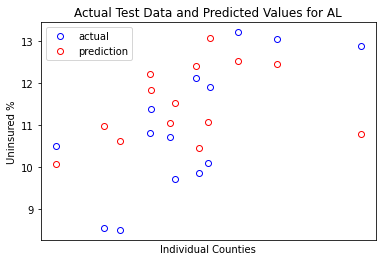

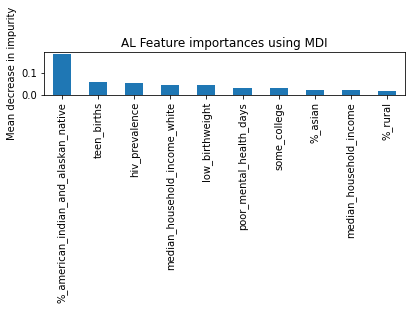





State of AK
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'sexually_transmitted_infections', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs', 'percentage_of_households_with_overcrowding', 'percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities', 'driving_alone_to_work', 'long_commute__driving_alone', 'life_expectancy', 'premature_age_adjus

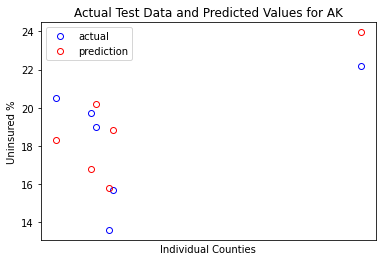

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


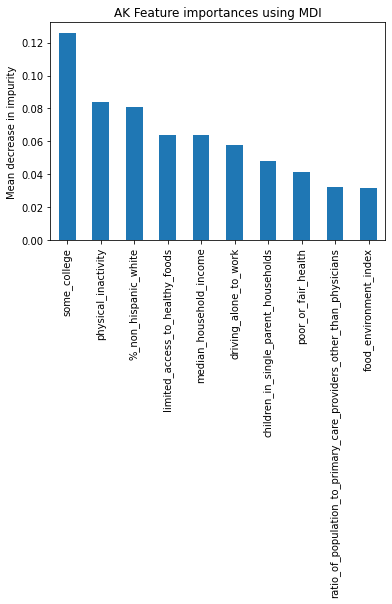





State of AZ
feature_list: ['name', 'premature_death', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_whit

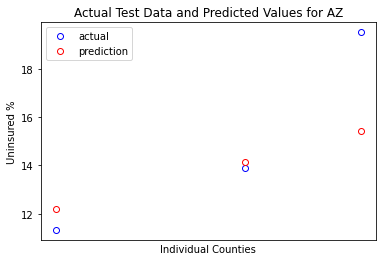

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


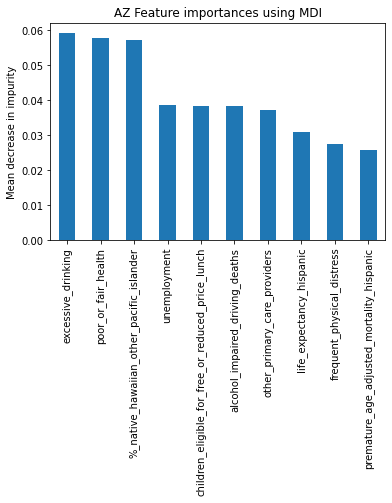





State of AR
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate

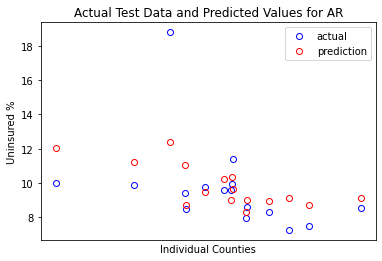

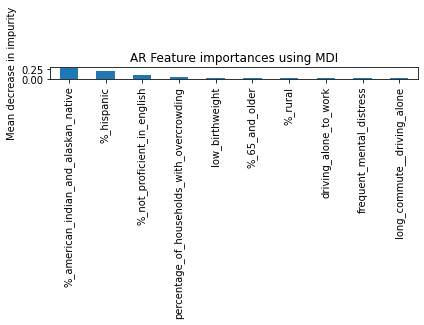





State of CA
feature_list: ['name', 'premature_death', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_hispani

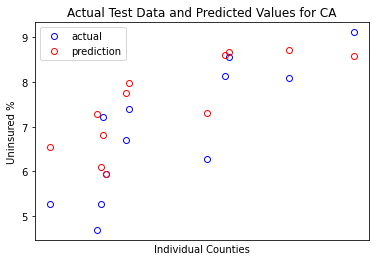

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


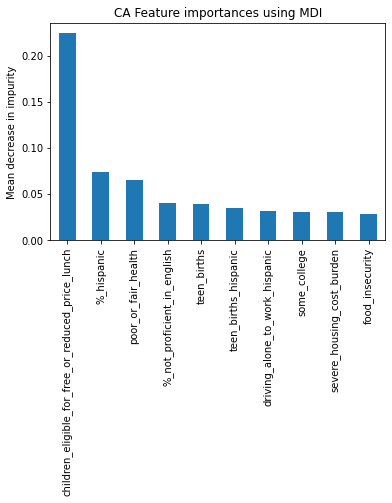





State of CO
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

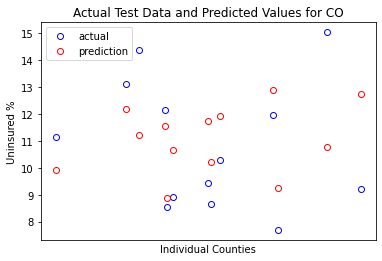

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


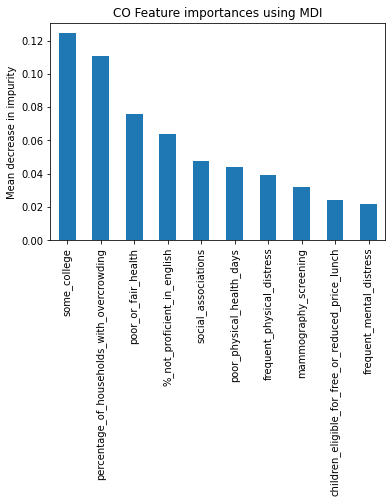





State of CT
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black'

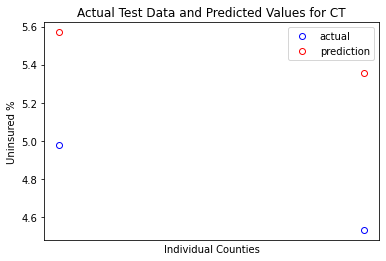

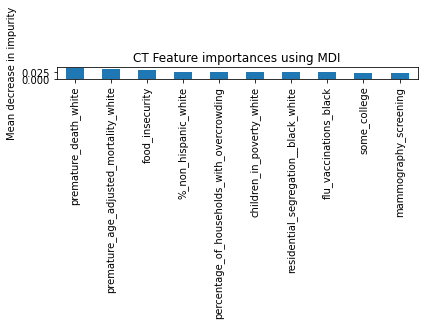





State of DE
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black'

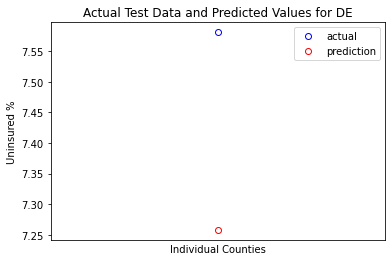

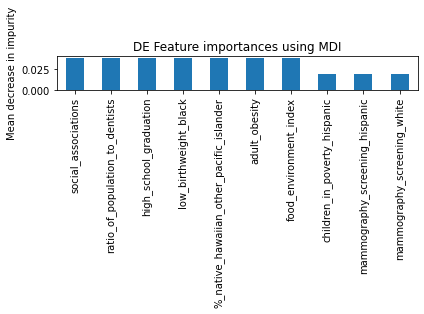





State of DC
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black'

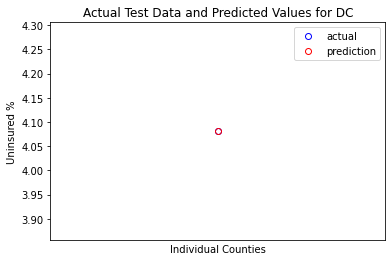

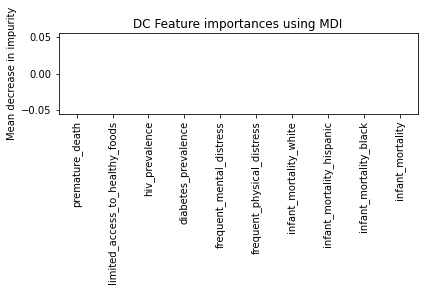





State of FL
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_hispanic', 'mammography_screening_white', 

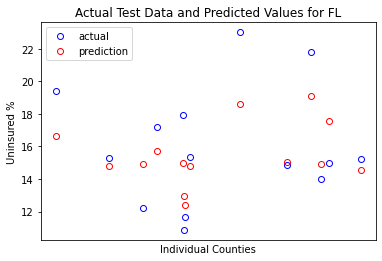

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


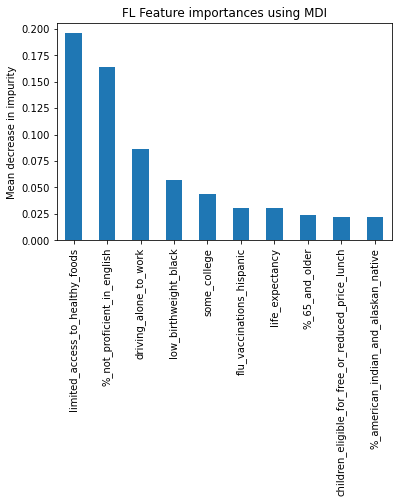





State of GA
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_g

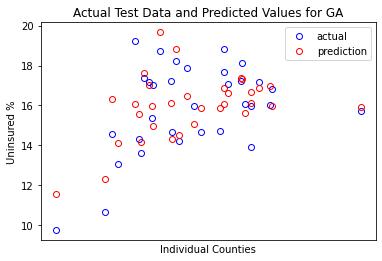

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


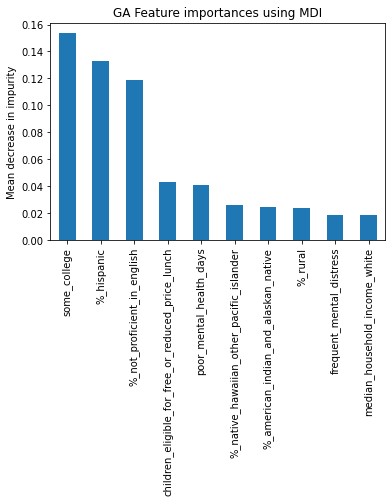





State of HI
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs', 'percentage_of_households_with_overcrowding', 'percentage_of_hou

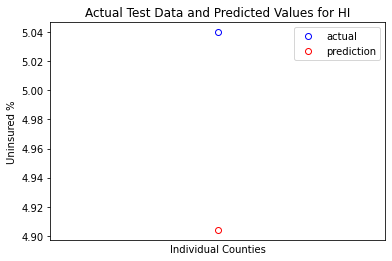

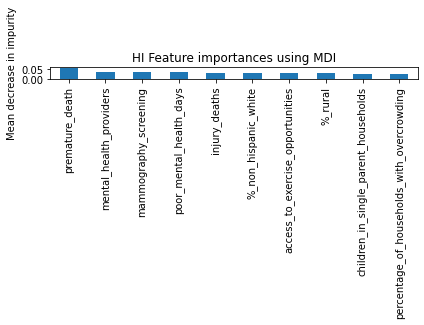





State of ID
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

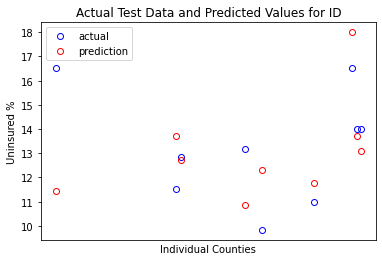

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


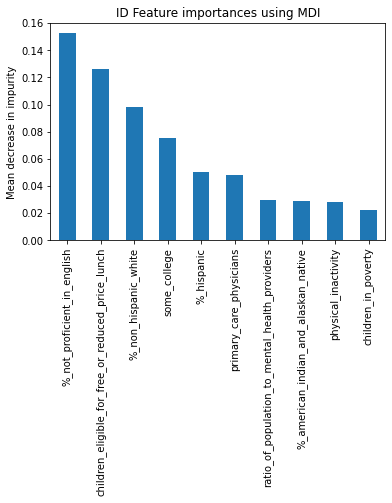





State of IL
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

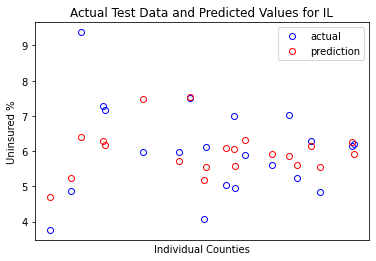

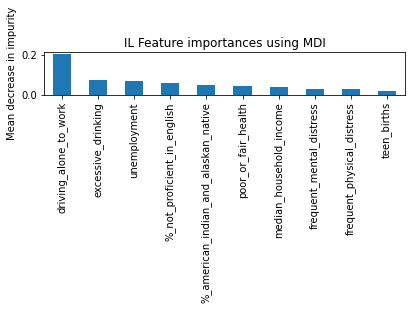





State of IN
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'perce

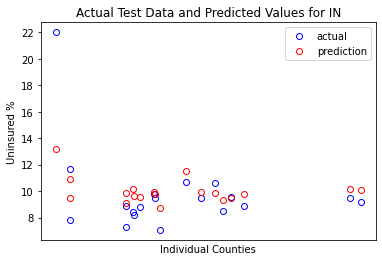

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


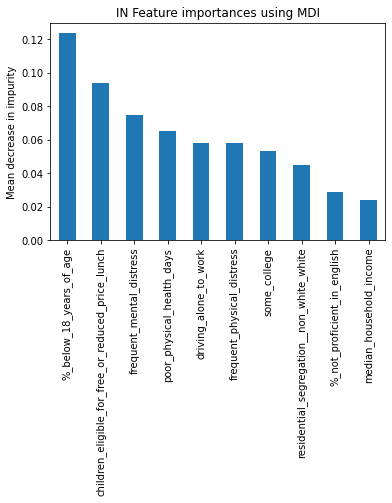





State of IA
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

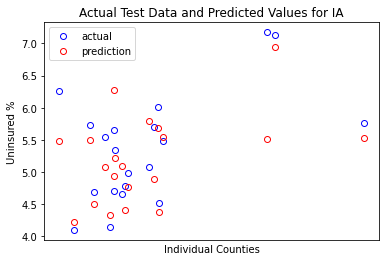

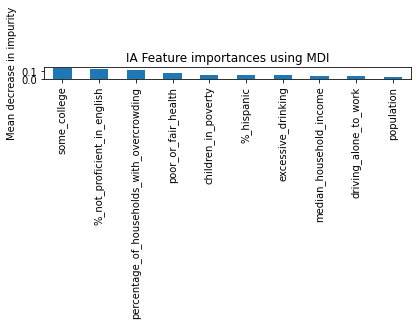





State of KS
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

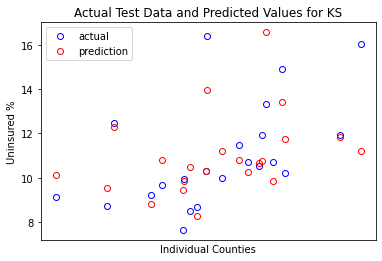

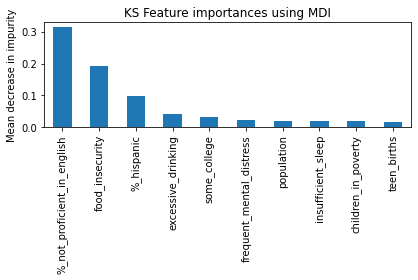





State of KY
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_househ

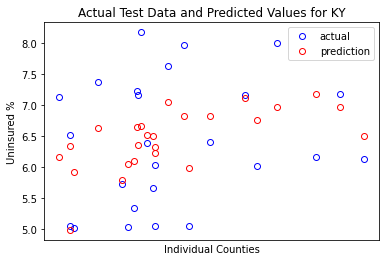

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


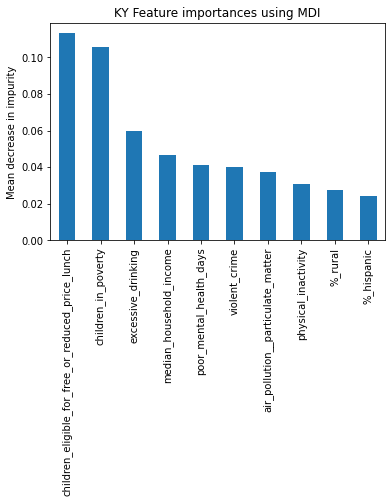





State of LA
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_g

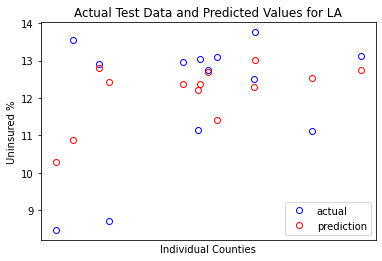

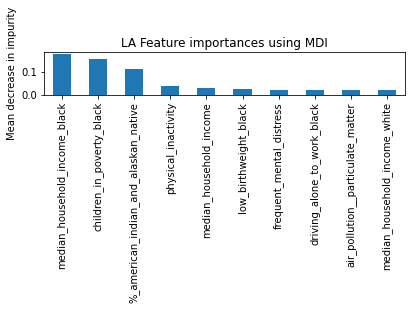





State of ME
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths'

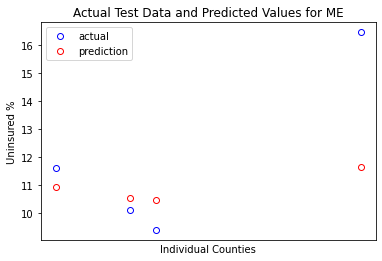

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


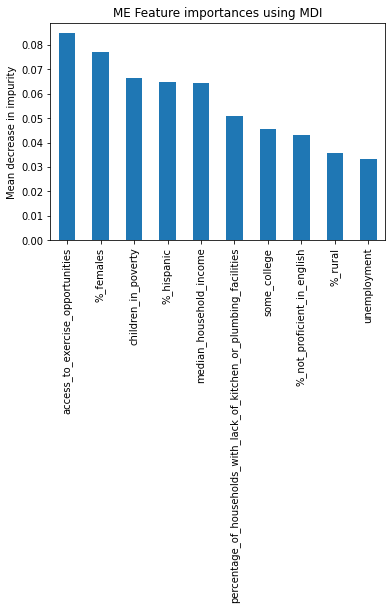





State of MD
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_hispanic', 'mammography_screening_white', 

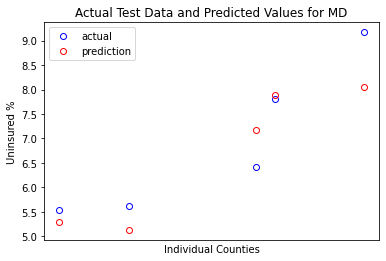

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


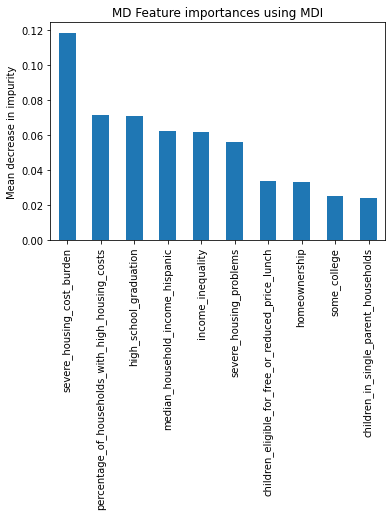





State of MA
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_hispanic', 'flu_vaccinations_whi

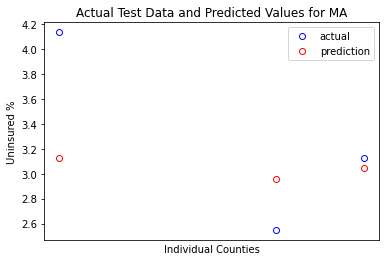

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


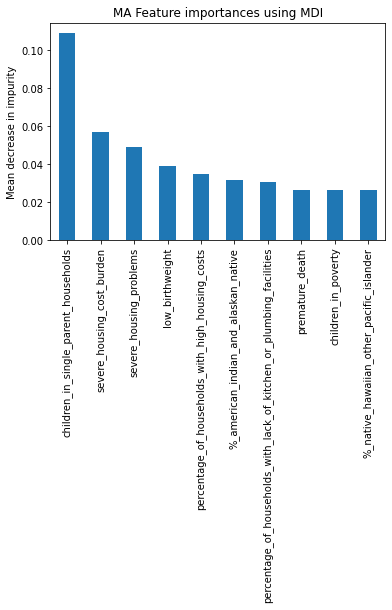





State of MI
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

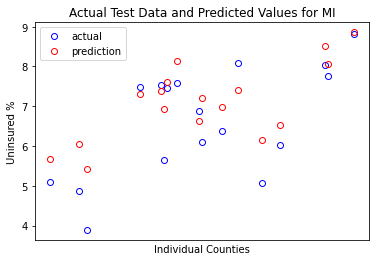

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


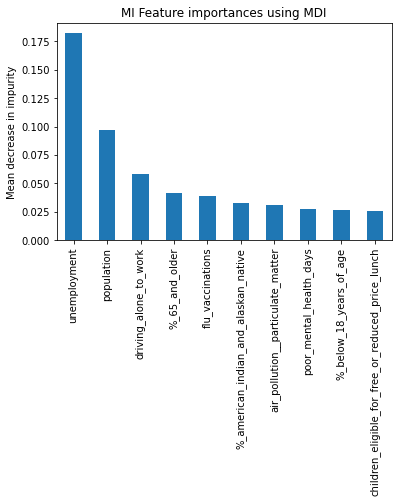





State of MN
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

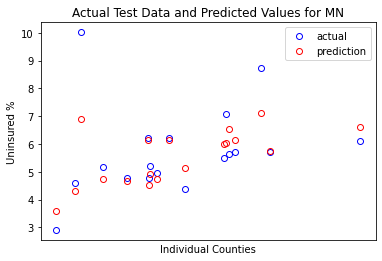

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


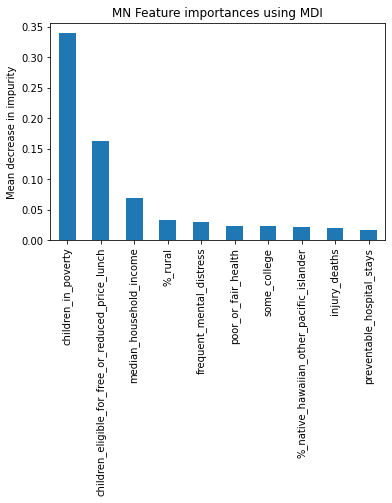





State of MS
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_g

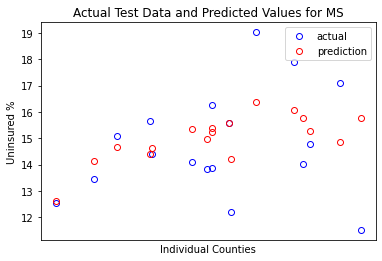

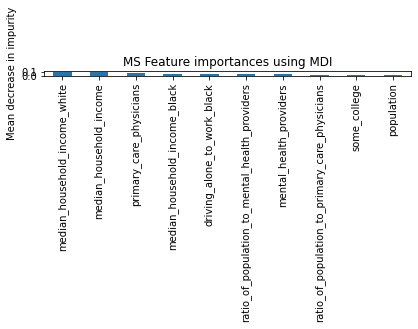





State of MO
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

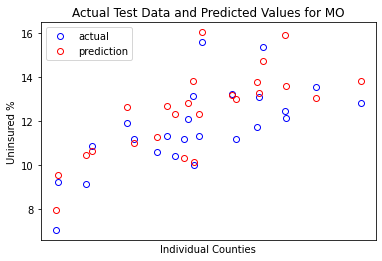

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


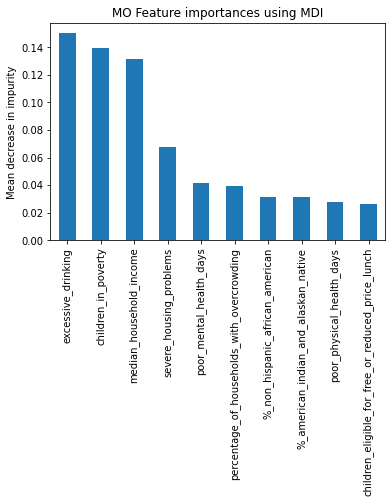





State of MT
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs', 'percentage_o

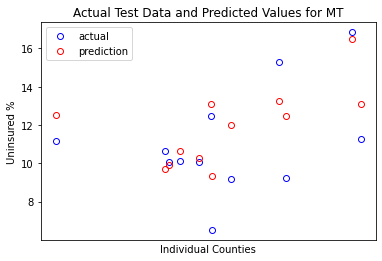

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


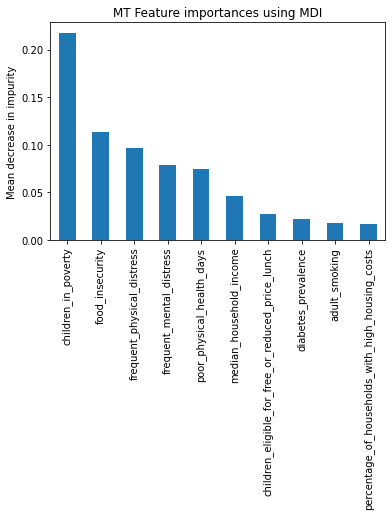





State of NE
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs', 'per

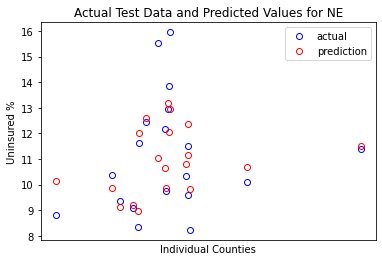

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


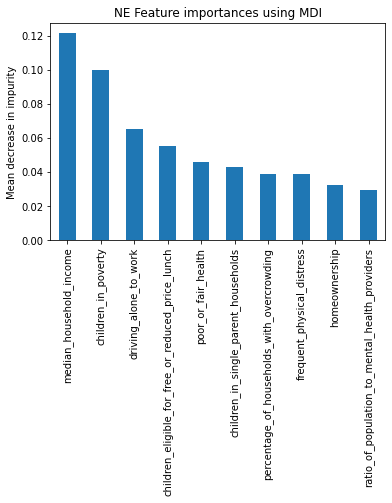





State of NV
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate

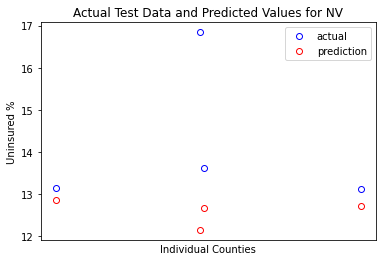

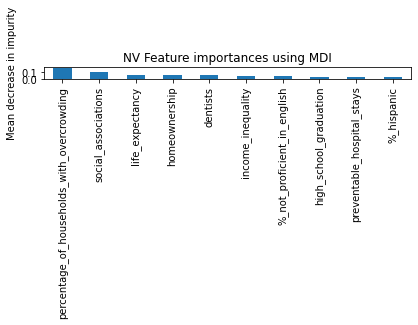





State of NH
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate

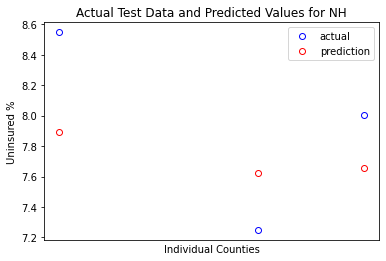

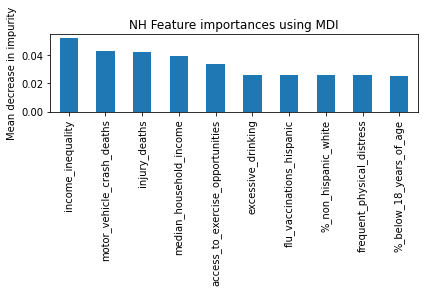





State of NJ
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black'

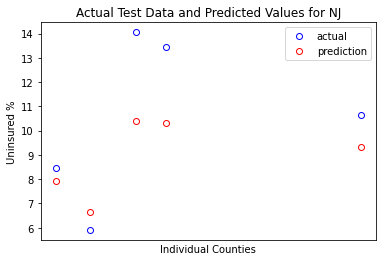

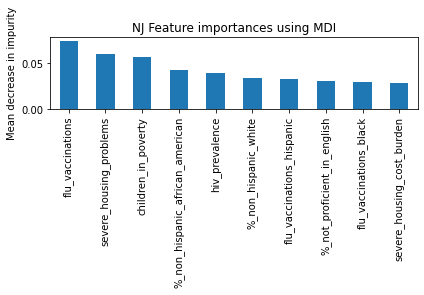





State of NM
feature_list: ['name', 'premature_death', 'premature_death_hispanic', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_hispanic', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_hispanic', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college',

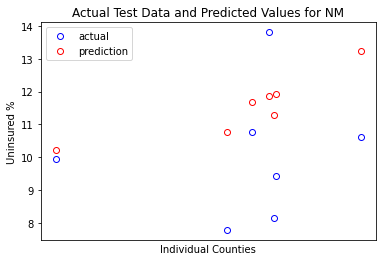

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


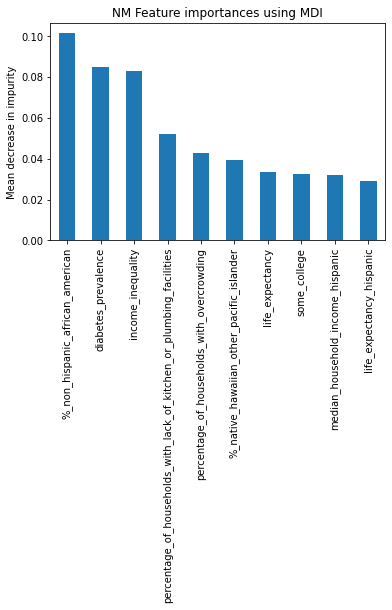





State of NY
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'chi

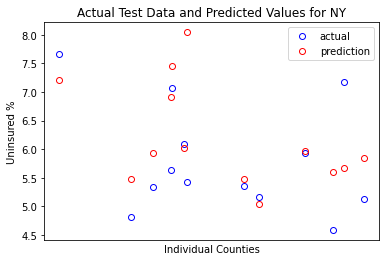

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


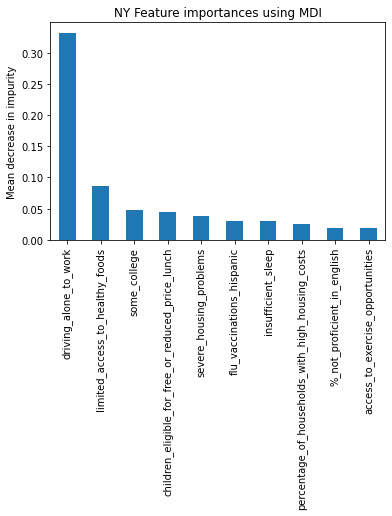





State of NC
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccination

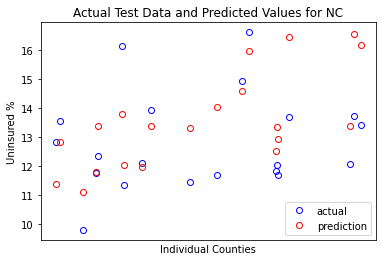

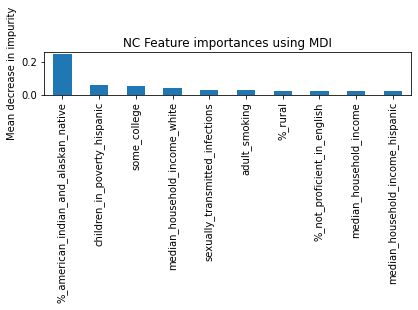





State of ND
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs', 'percentage_of_households_with_overcrowding', 'percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities'

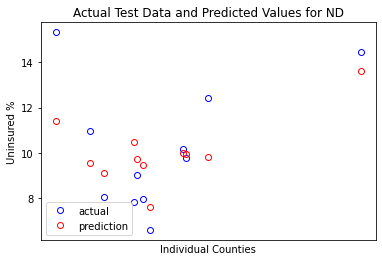

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


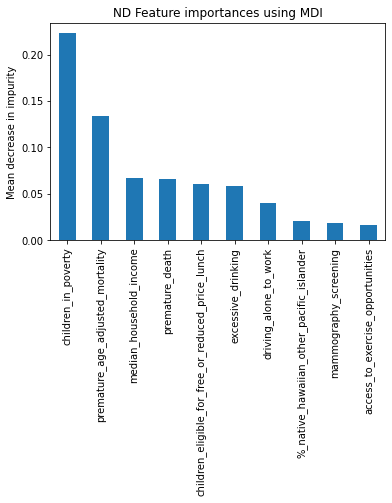





State of OH
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', '

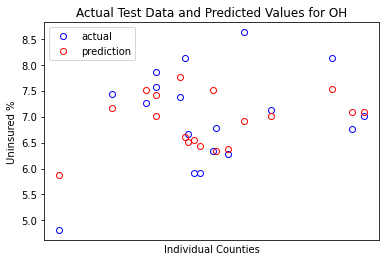

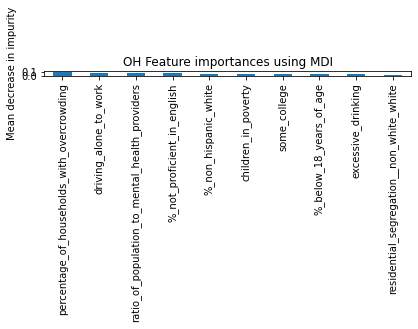





State of OK
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_vio

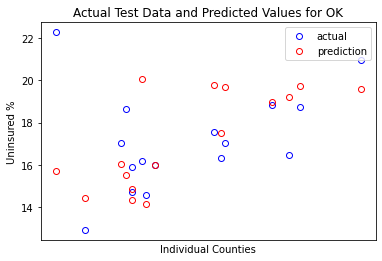

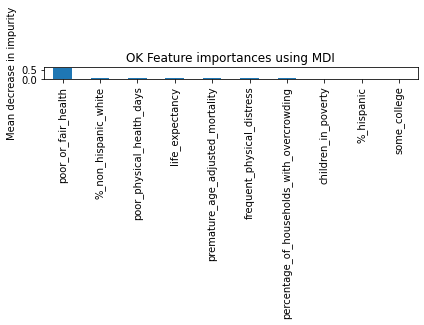





State of OR
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_association

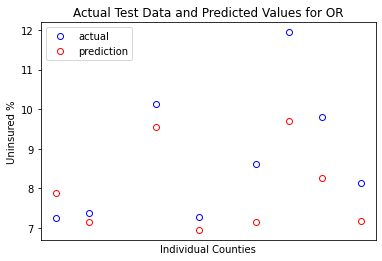

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


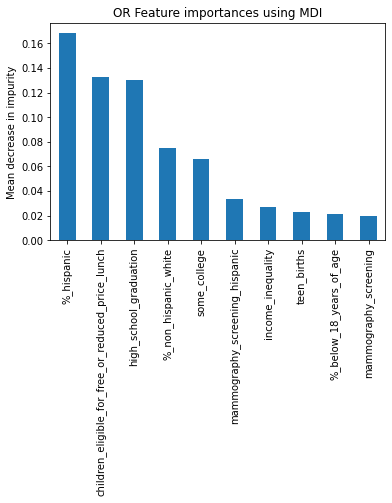





State of PA
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths'

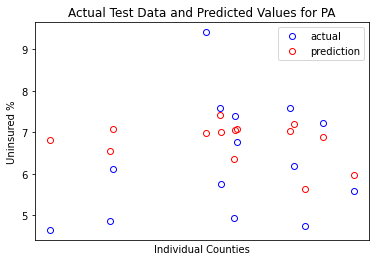

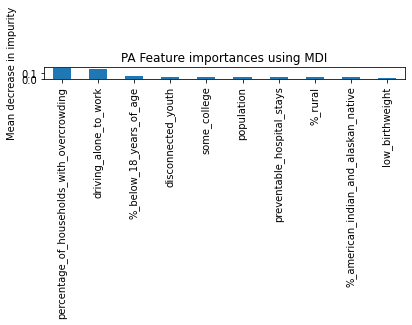





State of RI
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequal

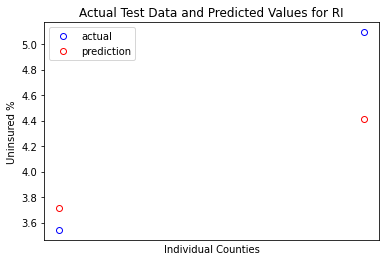

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


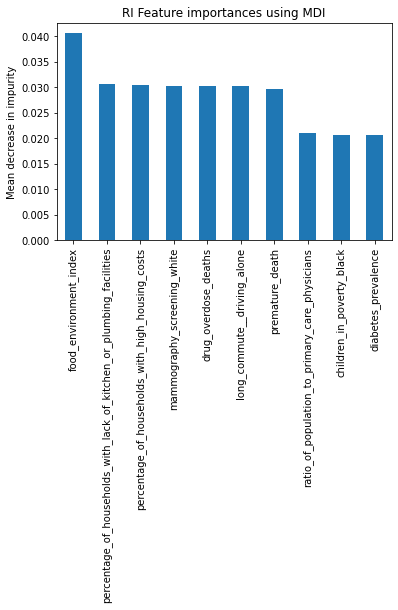





State of SC
feature_list: ['name', 'premature_death', 'premature_death_black', 'premature_death_white', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'low_birthweight_black', 'low_birthweight_white', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_black', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_g

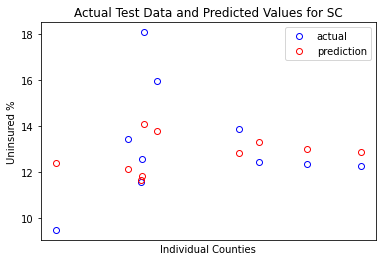

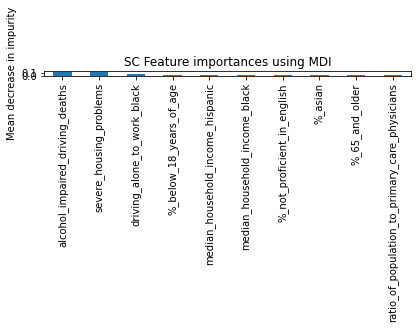





State of SD
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs', 'percentage_of_households_with_overcrowding', 'percentage_of_households_with_lack_of_kitchen_or_plumbing_facilities', 'drivin

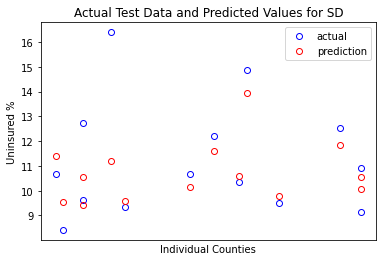

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


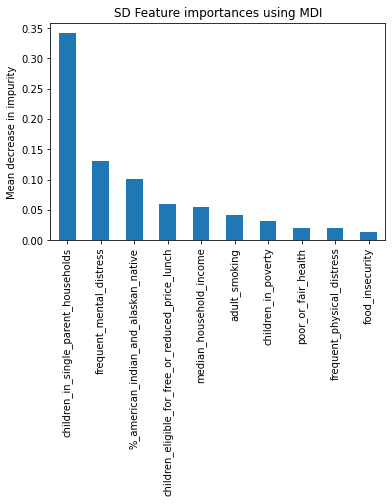





State of TN
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

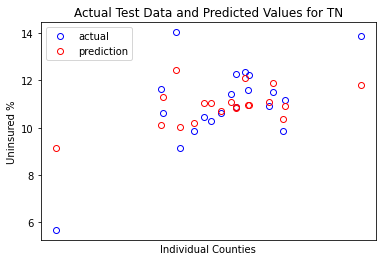

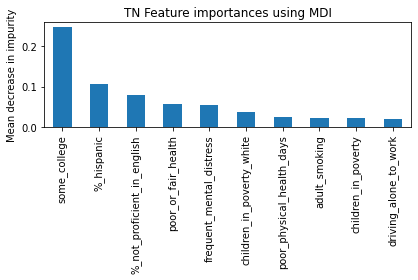





State of TX
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'teen_births_hispanic', 'teen_births_white', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white',

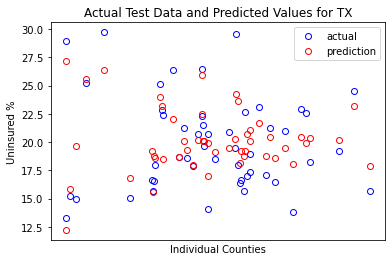

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


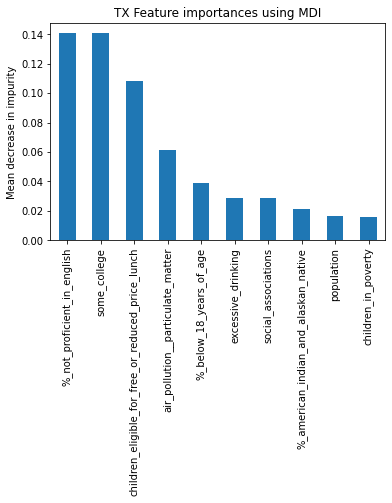





State of UT
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

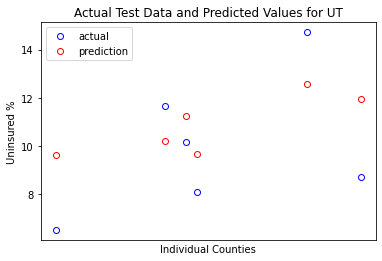

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


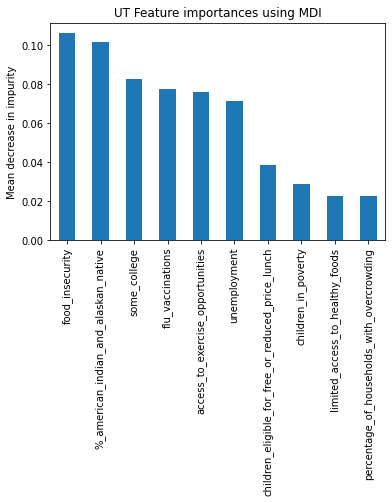





State of VT
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs'

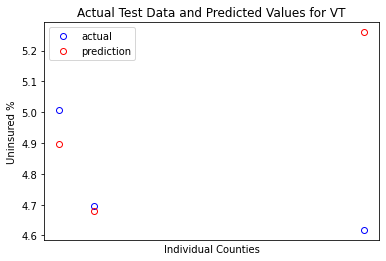

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


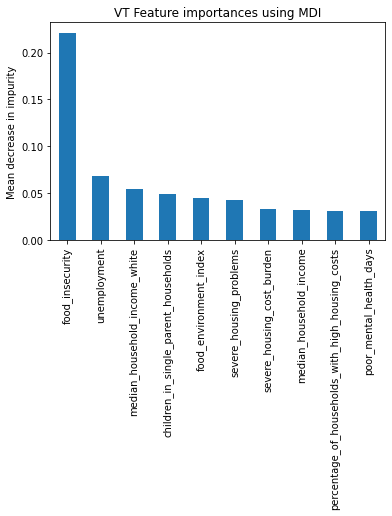





State of VA
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'preventable_hospital_stays_black', 'preventable_hospital_stays_white', 'mammography_screening', 'mammography_screening_black', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_black', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_black', 'children_in_poverty_white', 'income_inequalit

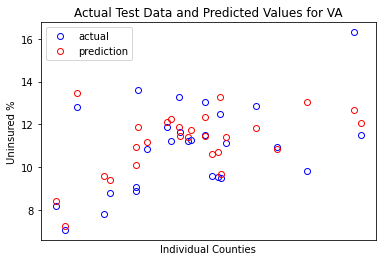

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


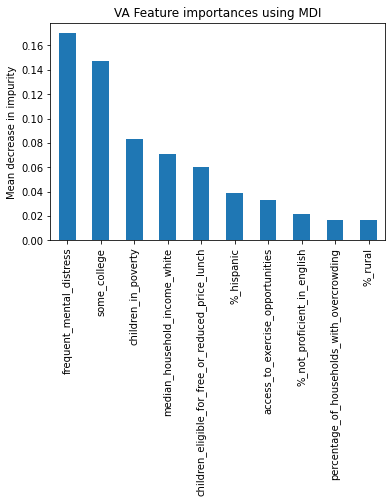





State of WA
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'mammography_screening_hispanic', 'mammography_screening_white', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_association

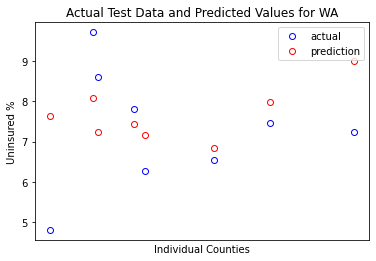

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


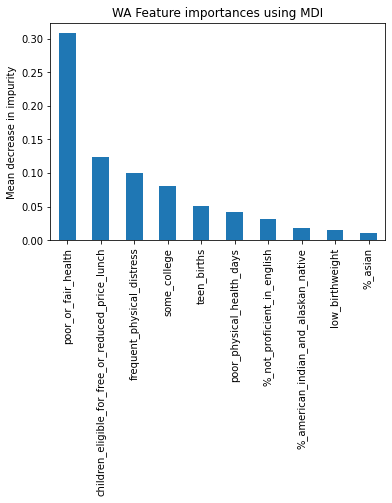





State of WV
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_problems', 'percentage_of_households_with_high_housing_costs'

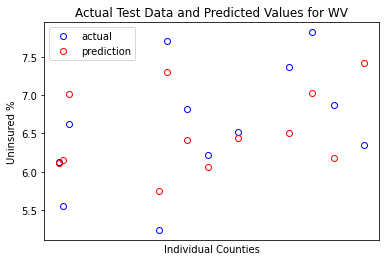

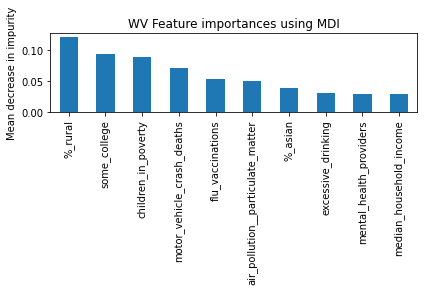





State of WI
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'children_in_poverty_hispanic', 'children_in_poverty_white', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_

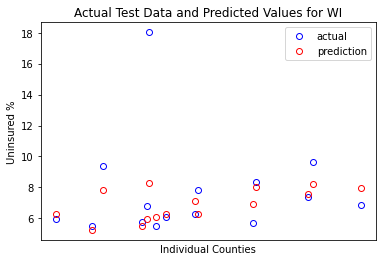

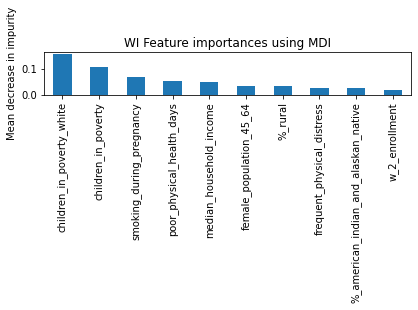





State of WY
feature_list: ['name', 'premature_death', 'poor_or_fair_health', 'poor_physical_health_days', 'poor_mental_health_days', 'low_birthweight', 'adult_smoking', 'adult_obesity', 'food_environment_index', 'physical_inactivity', 'access_to_exercise_opportunities', 'excessive_drinking', 'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections', 'teen_births', 'primary_care_physicians', 'ratio_of_population_to_primary_care_physicians', 'dentists', 'ratio_of_population_to_dentists', 'mental_health_providers', 'ratio_of_population_to_mental_health_providers', 'preventable_hospital_stays', 'mammography_screening', 'flu_vaccinations', 'flu_vaccinations_hispanic', 'flu_vaccinations_white', 'high_school_graduation', 'some_college', 'unemployment', 'children_in_poverty', 'income_inequality', 'children_in_single_parent_households', 'social_associations', 'violent_crime', 'injury_deaths', 'air_pollution__particulate_matter', 'drinking_water_violations', 'severe_housing_proble

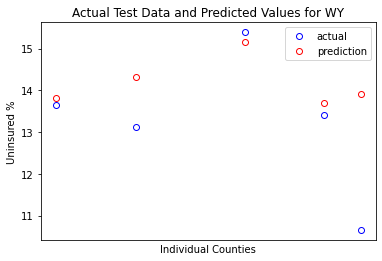

<ipython-input-6-9ccb999a8372>:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


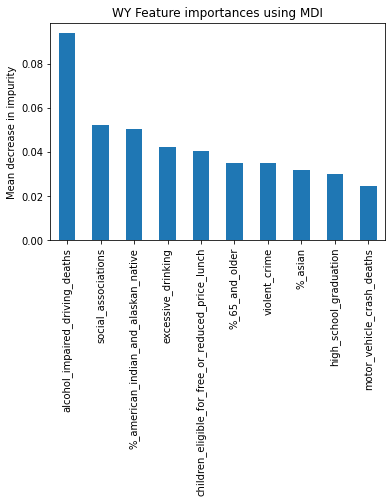

In [6]:
for state in df.state_abbreviation.unique():
    features_df = df.drop(['uninsured_adults', 'uninsured_children', 'county_fips_code',
                   '5_digit_fips_code'], axis = 1)
    
    features_df = features_df[features_df.state_abbreviation==state]
    # Replacing missing value of uninsured with mean of uninsured
    features_df['uninsured'] = features_df.uninsured.replace([float("nan")], features_df.uninsured.mean())
    for column in features_df.columns:
        na_sum= (features_df[column].isna().sum())
        column_size = (features_df[column].size)
        if (features_df[column].isna().sum()/features_df[column].size) > 0.25:
            features_df = features_df.drop(columns=column)
            
            
            
            
    
    state_groupby = features_df.groupby('state_abbreviation').count()
    null_count_dict = defaultdict(int)


    for column in state_groupby.columns:
        null_count_dict[column] = 0
        for state in state_groupby.index:
            value = state_groupby.loc[state][column]
            size = state_groupby.loc[state]['state_fips_code']
            if (value/size) <= 0.25:
                print("{0} is not useful for {1}: {2}".format(column, state, str(value/size)))
                null_count_dict[column] += 1

    exclude_features = []
    for feature, null_count in null_count_dict.items():
        if null_count > 13:
            exclude_features.append(feature.strip(""))
    
    features_df = features_df.drop(columns = exclude_features)
    
    # Drop indices that has more than 25% data
    exclude_indices = []
    for index in features_df.index:
        series = features_df.drop(columns=['state_fips_code', 'state_abbreviation', 'name']).loc[index]
        null_count = len(series[series.isnull()])
        series_size = len(series)
        if (null_count/series_size) >= 0.25:
            exclude_indices.append(index)

    features_df = features_df.drop(index=exclude_indices)
    
    # Illustrate missing data
    msno.matrix(features_df)
    plt.title("Missing data for {}".format(state))
    plt.close()
    
    
    features = features_df.drop(['uninsured','state_fips_code','state_abbreviation', 'name'], axis = 1)
    features_list = features_df.drop(['uninsured','state_fips_code','state_abbreviation'], axis = 1).columns.to_list()
    imp = SimpleImputer()
    features = imp.fit_transform(features)

    labels = np.array(features_df['uninsured'])
    
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)
    
    # Random forest regressor
    rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rf.fit(train_features, train_labels)
    state_model_dict[state] = rf
    print("State of {}".format(state))
    print("feature_list: {}".format(str(features_list)))
    print("\n")
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'percent.')
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    
    
    # Prepare visualizations
    name = features[:, features_list.index('name')]
    test_name = test_features[:, features_list.index('name')]


    # Dataframe with true values
    true_data = pd.DataFrame(data = {'county_name': test_name, 'actual': test_labels})
    true_data.actual = true_data.actual.apply(lambda x: x * 100.0)

    # Dataframe with predictions and dates
    predictions_data = pd.DataFrame(data = {'county_name': test_name, 'prediction': predictions})
    predictions_data.prediction = predictions_data.prediction.apply(lambda x: x * 100.0)
    
    # Plot the actual values
    plt.plot(true_data['county_name'], true_data['actual'], 'bo', label = 'actual', markerfacecolor='none')
    # Plot the predicted values
    plt.plot(predictions_data['county_name'], predictions_data['prediction'], 'ro', label = 'prediction',
             markerfacecolor='none')
    plt.xticks([]); 
    plt.legend()
    # Graph labels
    plt.xlabel('Individual Counties'); plt.ylabel('Uninsured %'); plt.title('Actual Test Data and Predicted Values for {}'.format(state));
    #plt.savefig("Data/Random_Forest_Results/Predictions_Scatter/{}_actual_predictions_scatter.png".format(state))
    plt.show()
    plt.close()
    
    # Feature Importance
    importances = rf.feature_importances_
    features_list.remove('name')
    
    forest_importances = pd.Series(importances, index=features_list)
    forest_importances = forest_importances.sort_values(ascending=False).head(10)
    
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("{} Feature importances using MDI".format(state))
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    #plt.savefig('Data/Random_Forest_Results/Feature_Importance/{}_feature_importance_bar.png'.format(state))
    plt.show()
    plt.close()
    
    print("\n")
    print("\n")
    
    

